In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import random

In [53]:
S = [1, 5, 10]
Q = [0, 1, 5, 10]
lam = [0.01, 0.1, 1, 10]
mu = [0.01, 0.04, 0.16, 0.64, 2.56, 10.24]

In [54]:
def pos(t, lam):
#     return 1-math.exp(-lam*t)
    return lam * math.exp(-lam*t)


In [55]:
def sim2(prob):
    poll = np.arange(1, 1001)
    select = np.random.choice(poll)
    return select <= prob*1000

In [56]:
def sim(pos):
    return random.randint(1, 1001) < pos*1000

1.0000000000000007
952


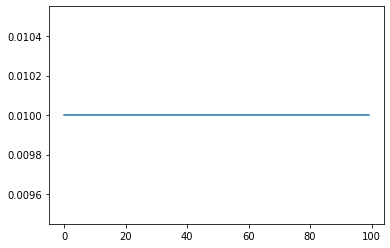

In [51]:
plt.plot([i for i in range(100)], [pos(0, 0.01) for i in range(100)])
count = 0
come = 0

for i in range(100):
    count += pos(0, 0.01)
print(count)

time_count = 0
for i in range(100000):
    time_count += 1
    if(sim(pos(0, 0.01))):
#         print("happen in ",time_count)
        come += 1
        time_count = 0

print(come)

In [62]:
arrival_num = 0
block_num = 0
queue_num = 0
server_num = 0

q = 0
s = 1
lam = 0.01
mu = 0.01
time = 0

lam /= 100
mu /= 100

time_count = np.zeros(s+1)
leav_prob = np.zeros(s)
server_count = np.zeros(s)

departure = np.zeros(100000)
arrival = np.zeros(100000)
blocked = np.zeros(100000)
time_unit = np.arange(100000)

for runtime in range(100000):
    
    for i in range(s+1):
        if(i == 0):
            time_count[i] += 1
        elif(server_count[i-1] != 0):
            time_count[i-1] += 1
        
    #cal arrival prob.
    arrival_prob = pos(0, lam)
    
#     print("arrival prob", arrival_prob)
     #check arriavl
    if(sim(arrival_prob)):
        arrival_num +=1
        time_count[0] = 0
        #check block
        if(queue_num+server_num > s+q-1):
            block_num += 1
            blocked[time] += 1
        else:
            arrival[time] += 1
            if(server_num < s):
                for i in range(s):
                    if(server_count[i] == 0):
                        time_count[i] = 0
                        server_num += 1
                        server_count[i] = 1
                        break
            elif(queue_num < q):
                 queue_num += 1
            else:
                print("arrival but no where to go")
    
    for i in range(s):
        if(server_count[i] == 1):
            #cal leaving prob.
            leav_prob[i] = pos(0, mu)
#             print("leav time count ",time_count[i+1])
            #check leave
            if(sim(leav_prob[i])):
                time_count[i+1] = 0
                if(queue_num > 0):
                    queue_num -= 1
                server_num -= 1  
                #add deaparture
                departure[time] += 1
                server_count[i] = 0
    

    time += 1
    
    
print(arrival_num)
print(block_num)
if(block_num != 0):
    print(block_num/arrival_num*100, "%")


0
0


In [61]:
columns = ["BP_"+str(i) for i in range(1, 25)]

for s in tqdm(S):
    for q in Q:
        for l in lam:
            l /= 100
            for m in mu:
                bp=np.zeros(0)
                #10^-2 sec to one time unit
                m /= 100
                for epoch in range(10):
                    time = 0
                    arrival_num = 0
                    block_num = 0
                    queue_num = 0
                    server_num = 0
            

                    time_count = np.zeros(s+1)
                    leav_prob = np.zeros(s)
                    server_count = np.zeros(s)

                    departure = np.zeros(100000)
                    arrival = np.zeros(100000)
                    blocked = np.zeros(100000)
                    time_unit = np.arange(100000)

                    for runtime in range(100000):

                        for i in range(s+1):
                            if(i == 0):
                                time_count[i] += 1
                            elif(server_count[i-1] != 0):
                                time_count[i-1] += 1

                        #cal arrival prob.
                        arrival_prob = pos(0, l)

                    #     print("arrival prob", arrival_prob)
                         #check arriavl
                        if(sim(arrival_prob)):
                            arrival_num +=1
                            time_count[0] = 0
                            #check block
                            if(queue_num+server_num > s+q-1):
                                block_num += 1
                                blocked[time] += 1
                            else:
                                arrival[time] += 1
                                if(server_num < s):
                                    for i in range(s):
                                        if(server_count[i] == 0):
                                            time_count[i] = 0
                                            server_num += 1
                                            server_count[i] = 1
                                            break
                                elif(queue_num < q):
                                     queue_num += 1
                                else:
                                    print("arrival but no where to go")

                        for i in range(s):
                            if(server_count[i] == 1):
                                #cal leaving prob.
                                leav_prob[i] = pos(0, m)
                    #             print("leav time count ",time_count[i+1])
                                #check leave
                                if(sim(leav_prob[i])):
                                    time_count[i+1] = 0
                                    if(queue_num > 0):
                                        queue_num -= 1
                                    server_num -= 1  
                                    #add deaparture
                                    departure[time] += 1
                                    server_count[i] = 0


                        time += 1


#                     print(arrival_num)
#                     print(block_num)
                    if(block_num != 0):
#                         print(block_num/arrival_num*100, "%")
                        bp = np.append(bp, block_num/arrival_num*100)
                    else:
                        bp = np.append(bp, 0)

#                     event_table = pd.DataFrame({"Time unit":time_unit, "Arrival":arrival, "Departure":departure, "Blocked":blocked})
#                     status_table = pd.DataFrame({"# of queue":[q], "# of server":[s], "lambda":[l], "mue":[m]})
#                     status_table.to_csv('event_table.csv', index=False, mode='a')
#                     event_table.to_csv('event_table.csv', index=False, mode='a')
                print("Q ",q,"S ", s,"lam ", l*100,"mu ", m*100)
                print(bp.mean())
#     if(q==0):
#     else:

#         if(Q==0):
#             blocking_probability_table_Q0 = pd.DataFrame([x,[1,3],[1,2]],index=[1, 5, 10], columns=columns)
#             blocking_probability_table_Q0.to_csv('blocking_probability_table_Q0', index=False, mode='a')
#         else:
#             blocking_probability_table_QS = pd.DataFrame([x,[1,3],[1,2]],index=[1, 5, 10], columns=columns)
#             blocking_probability_table_QS.to_csv('blocking_probability_table_QS', index=False, mode='a')


  0%|          | 0/3 [00:00<?, ?it/s]

Q  0 S  1 lam  0.01 mu  0.01
0.0
Q  0 S  1 lam  0.01 mu  0.04
0.0
Q  0 S  1 lam  0.01 mu  0.16
0.0
Q  0 S  1 lam  0.01 mu  0.64
0.0
Q  0 S  1 lam  0.01 mu  2.56
0.0
Q  0 S  1 lam  0.01 mu  10.24
0.0
Q  0 S  1 lam  0.1 mu  0.01
0.0
Q  0 S  1 lam  0.1 mu  0.04
0.0
Q  0 S  1 lam  0.1 mu  0.16
0.0
Q  0 S  1 lam  0.1 mu  0.64
0.0
Q  0 S  1 lam  0.1 mu  2.56
0.0
Q  0 S  1 lam  0.1 mu  10.24
0.0
Q  0 S  1 lam  1.0 mu  0.01
99.88967105050037
Q  0 S  1 lam  1.0 mu  0.04
99.88922401127884
Q  0 S  1 lam  1.0 mu  0.16
90.305552898511
Q  0 S  1 lam  1.0 mu  0.64
59.52501075035125
Q  0 S  1 lam  1.0 mu  2.56
25.769518358049613
Q  0 S  1 lam  1.0 mu  10.24
7.34759600173828
Q  0 S  1 lam  10.0 mu  0.01
99.98990227381996
Q  0 S  1 lam  10.0 mu  0.04
99.98986436519776
Q  0 S  1 lam  10.0 mu  0.16
98.98654098370505
Q  0 S  1 lam  10.0 mu  0.64
94.19325560250896
Q  0 S  1 lam  10.0 mu  2.56
79.23022648160709
Q  0 S  1 lam  10.0 mu  10.24
46.431478295901925
Q  1 S  1 lam  0.01 mu  0.01
0.0
Q  1 S  1 lam  0

 33%|███▎      | 1/3 [07:50<15:41, 470.85s/it]

Q  10 S  1 lam  10.0 mu  10.24
1.9301948822773844
Q  0 S  5 lam  0.01 mu  0.01
0.0
Q  0 S  5 lam  0.01 mu  0.04
0.0
Q  0 S  5 lam  0.01 mu  0.16
0.0
Q  0 S  5 lam  0.01 mu  0.64
0.0
Q  0 S  5 lam  0.01 mu  2.56
0.0
Q  0 S  5 lam  0.01 mu  10.24
0.0
Q  0 S  5 lam  0.1 mu  0.01
0.0
Q  0 S  5 lam  0.1 mu  0.04
0.0
Q  0 S  5 lam  0.1 mu  0.16
0.0
Q  0 S  5 lam  0.1 mu  0.64
0.0
Q  0 S  5 lam  0.1 mu  2.56
0.0
Q  0 S  5 lam  0.1 mu  10.24
0.0
Q  0 S  5 lam  1.0 mu  0.01
99.44013366818844
Q  0 S  5 lam  1.0 mu  0.04
99.43550985948863
Q  0 S  5 lam  1.0 mu  0.16
51.18910566982538
Q  0 S  5 lam  1.0 mu  0.64
1.378527377049371
Q  0 S  5 lam  1.0 mu  2.56
0.0
Q  0 S  5 lam  1.0 mu  10.24
0.0
Q  0 S  5 lam  10.0 mu  0.01
99.94948161069162
Q  0 S  5 lam  10.0 mu  0.04
99.94946250160112
Q  0 S  5 lam  10.0 mu  0.16
95.00722997539324
Q  0 S  5 lam  10.0 mu  0.64
71.46179395327256
Q  0 S  5 lam  10.0 mu  2.56
18.29551360818025
Q  0 S  5 lam  10.0 mu  10.24
0.10793691320280745
Q  1 S  5 lam  0.01 mu  

 67%|██████▋   | 2/3 [26:22<11:03, 663.16s/it]

Q  10 S  5 lam  10.0 mu  10.24
0.0
Q  0 S  10 lam  0.01 mu  0.01
0.0
Q  0 S  10 lam  0.01 mu  0.04
0.0
Q  0 S  10 lam  0.01 mu  0.16
0.0
Q  0 S  10 lam  0.01 mu  0.64
0.0
Q  0 S  10 lam  0.01 mu  2.56
0.0
Q  0 S  10 lam  0.01 mu  10.24
0.0
Q  0 S  10 lam  0.1 mu  0.01
0.0
Q  0 S  10 lam  0.1 mu  0.04
0.0
Q  0 S  10 lam  0.1 mu  0.16
0.0
Q  0 S  10 lam  0.1 mu  0.64
0.0
Q  0 S  10 lam  0.1 mu  2.56
0.0
Q  0 S  10 lam  0.1 mu  10.24
0.0
Q  0 S  10 lam  1.0 mu  0.01
98.88011732613084
Q  0 S  10 lam  1.0 mu  0.04
98.8980651191177
Q  0 S  10 lam  1.0 mu  0.16
15.7215879502964
Q  0 S  10 lam  1.0 mu  0.64
0.0
Q  0 S  10 lam  1.0 mu  2.56
0.0
Q  0 S  10 lam  1.0 mu  10.24
0.0
Q  0 S  10 lam  10.0 mu  0.01
99.89964631101006
Q  0 S  10 lam  10.0 mu  0.04
99.89923223910645
Q  0 S  10 lam  10.0 mu  0.16
89.83329421793833
Q  0 S  10 lam  10.0 mu  0.64
45.13603794274216
Q  0 S  10 lam  10.0 mu  2.56
0.3017594758289387
Q  0 S  10 lam  10.0 mu  10.24
0.0
Q  1 S  10 lam  0.01 mu  0.01
0.0
Q  1 S  10 l

100%|██████████| 3/3 [57:05<00:00, 1141.98s/it]

Q  10 S  10 lam  10.0 mu  10.24
0.0


In [107]:
event_table = pd.DataFrame({"Time unit":time_unit, "Arrival":arrival, "Departure":departure, "Blocked":blocked})
status_table = pd.DataFrame({"# of queue":[Q], "# of server":[S], "lambda":[lam], "mue":[mu]})
status_table.to_csv('event_table.csv', index=False, mode='a')
event_table.to_csv('event_table.csv', index=False, mode='a')

       Time unit  Arrival  Departure  Blocked
0              0      0.0        0.0      0.0
1              1      0.0        0.0      0.0
2              2      0.0        0.0      0.0
3              3      0.0        0.0      0.0
4              4      0.0        0.0      0.0
...          ...      ...        ...      ...
99995      99995      0.0        0.0      0.0
99996      99996      0.0        0.0      0.0
99997      99997      0.0        0.0      0.0
99998      99998      0.0        0.0      0.0
99999      99999      1.0        0.0      0.0

[100000 rows x 4 columns]


In [97]:
x=[2,3]
blocking_probability_table_Q0 = pd.DataFrame([x,[1,3],[1,2]],index=[1, 5, 10], columns=['BP_1', 'BP_2'])
print(blocking_probability_table_Q0)
print(blocking_probability_table_Q0['BP_1'].iloc[1])
print(blocking_probability_table_Q0.iloc[0,:])
print(["BP_"+str(i) for i in range(1, 25)])

    BP_1  BP_2
1      2     3
5      1     3
10     1     2
1
BP_1    2
BP_2    3
Name: 1, dtype: int64
['BP_1', 'BP_2', 'BP_3', 'BP_4', 'BP_5', 'BP_6', 'BP_7', 'BP_8', 'BP_9', 'BP_10', 'BP_11', 'BP_12', 'BP_13', 'BP_14', 'BP_15', 'BP_16', 'BP_17', 'BP_18', 'BP_19', 'BP_20', 'BP_21', 'BP_22', 'BP_23', 'BP_24']


In [41]:
blocking_probability_table_QS = pd.DataFrame()

0.0


In [113]:
x = np.zeros(0)
x = np.append(x, [1,2,3])
print(x)
print(x.mean())

[1. 2. 3.]
2.0


In [13]:
print( random.randint(1,10) ) 

1


In [14]:
def sim(pos):
    return random.randint(1, 1001) < pos*1000

In [26]:
count = 0
for i in range(100000):
    if(sim(0.1)):
        count += 1
print(count)

9675


In [20]:
def sim2(prob):
    poll = np.arange(1, 1001)
    select = np.random.choice(poll)
    return select <= prob*1000

In [23]:
count = 0
for i in range(100000):
    if(sim2(0.1)):
        count += 1
print(count)

10055
